In [1]:
# Pandas is used for data manipulation
import pandas as pd
# Use numpy to convert to arrays
import numpy as np
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
# To show a figure in notebook
from IPython.display import Image
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Use datetime for creating date objects for plotting
import datetime

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
# Read in data
data = pd.read_csv('weatherHistory.csv')
data = data.drop(data.columns[0], axis=1)
data = data.drop(data.columns[3], axis=1)
Target = (data.columns[2])
features = data.sample(frac=0.1,random_state=200)

In [4]:
Target

'Temperature (C)'

In [5]:
features.head(5)

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
81986,Clear,rain,2.066667,0.74,19.6259,140.0,15.8263,0.0,1016.76,Partly cloudy starting overnight continuing un...
86319,Overcast,rain,11.061111,0.80,14.2807,81.0,8.1305,0.0,1019.47,Mostly cloudy throughout the day.
39332,Partly Cloudy,rain,23.100000,0.65,3.9928,292.0,10.3523,0.0,1015.41,Partly cloudy until night.
50219,Mostly Cloudy,rain,17.366667,0.66,20.2377,139.0,11.2700,0.0,1004.66,Partly cloudy throughout the day.
43601,Partly Cloudy,rain,17.738889,0.57,4.8461,87.0,10.4006,0.0,1010.91,Mostly cloudy throughout the day.


In [6]:
print('The shape of our features is:', features.shape)

The shape of our features is: (9645, 10)


In [7]:
# Descriptive statistics for each column
features.describe()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,9645.000000,9645.000000,9645.000000,9645.000000,9645.000000,9645.0,9645.000000
mean,11.888017,0.737849,10.756216,187.815448,10.384193,0.0,1001.983240
std,9.454788,0.194775,6.937832,107.025158,4.188821,0.0,121.854599
min,-20.555556,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.766667,0.610000,5.651100,119.000000,8.355900,0.0,1011.780000
50%,11.855556,0.790000,9.901500,181.000000,10.046400,0.0,1016.420000
75%,18.794444,0.900000,14.103600,290.000000,14.908600,0.0,1021.030000
max,38.983333,1.000000,50.972600,359.000000,16.100000,0.0,1045.320000


In [8]:
# One-hot encode the data using pandas get_dummies
features = pd.get_dummies(features)
# Display the first 5 rows of the last 12 columns
features.head(5)

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Summary_Breezy,Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,...,Daily Summary_Partly cloudy until evening.,Daily Summary_Partly cloudy until morning.,Daily Summary_Partly cloudy until night and breezy in the afternoon.,Daily Summary_Partly cloudy until night and breezy in the morning.,Daily Summary_Partly cloudy until night and breezy starting in the morning continuing until afternoon.,Daily Summary_Partly cloudy until night.,Daily Summary_Rain throughout the day.,Daily Summary_Rain until afternoon.,Daily Summary_Rain until morning.,Daily Summary_Windy in the afternoon.
81986,2.066667,0.74,19.6259,140.0,15.8263,0.0,1016.76,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86319,11.061111,0.80,14.2807,81.0,8.1305,0.0,1019.47,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39332,23.100000,0.65,3.9928,292.0,10.3523,0.0,1015.41,0,0,0,...,0,0,0,0,0,1,0,0,0,0
50219,17.366667,0.66,20.2377,139.0,11.2700,0.0,1004.66,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43601,17.738889,0.57,4.8461,87.0,10.4006,0.0,1010.91,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Labels are the values we want to predict
labels = np.array(features[Target])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop(Target, axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features_nparray = np.array(features)

In [11]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features_nparray, labels, test_size = 0.25, random_state = 42)

In [12]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (7233, 238)
Training Labels Shape: (7233,)
Testing Features Shape: (2412, 238)
Testing Labels Shape: (2412,)


In [13]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1200, random_state = 42, n_jobs = -1, verbose = 1)

In [14]:
# Train the model on training data
rf.fit(train_features, train_labels);

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:   47.2s finished


In [16]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 1200 out of 1200 | elapsed:    0.8s finished


In [24]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees')
print('SD Absolute error: ', round(np.std(errors), 2))
print('Minimal Absolute error: ', round(np.min(errors), 2))
print('Maximal Absolute error: ', round(np.max(errors), 2))


Mean Absolute Error: 3.65 degrees
SD Absolute error:  3.06
Minimal Absolute error:  0.0
Maximal Absolute error:  26.32


In [18]:
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [19]:
rf.estimators_[0]

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1608637542, splitter='best')

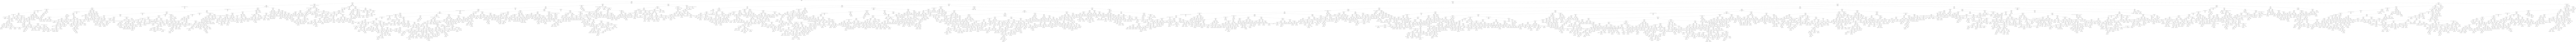

In [20]:
Image(filename='tree.png')

In [21]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

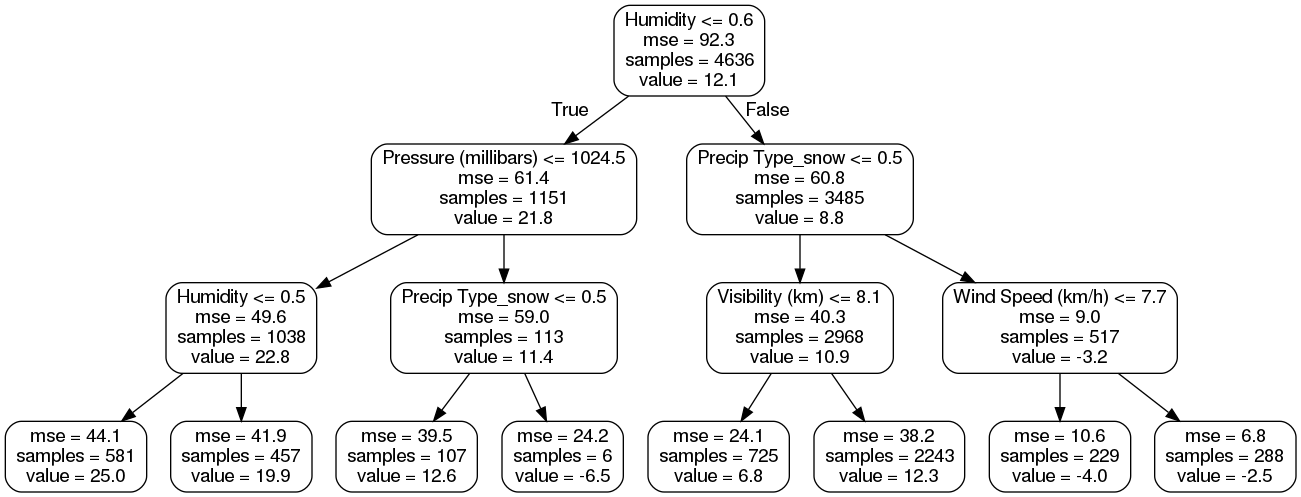

In [22]:
Image(filename='small_tree.png')